In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
np.random.seed(42)
data = {
    "order_id": range(1, 301),
    "date": pd.date_range(start="2023-01-01", periods=300),
    "customer_id": np.random.choice([f"C{str(i).zfill(4)}" for i in range(1000, 9999)], 300),
    "city": np.random.choice(['Tehran', 'Isfahan', 'Shiraz', 'Tabriz', 'Mashhad', 'Ahvaz', 'Kish', 'Rasht'], 300),
    "product_category": np.random.choice(['Electronics', 'Clothing', 'Books', 'Home', 'Sports', 'Beauty'], 300),
    "price": np.round(np.random.uniform(10, 1000, 300), 0),
    "quantity": np.random.randint(1, 11, 300),
    "discount": np.round(np.random.uniform(0, 0.3, 300), 2),
    "payment_method": np.random.choice(['Credit', 'Debit', 'PayPal', 'Cash'], 300)
}

df = pd.DataFrame(data)
df['price'] = df['price'].astype(float)
df['discount'] = df['discount'].astype(float)
price_nan_idx = np.random.choice(df.index, size=int(0.1 * 300), replace=False)
df.loc[price_nan_idx, 'price'] = np.nan
discount_nan_idx = np.random.choice(df.index, size=int(0.05 * 300), replace=False)
df.loc[discount_nan_idx, 'discount'] = np.nan

city_nan_idx = np.random.choice(df.index, size=int(0.08 * 300), replace=False)
df.loc[city_nan_idx, 'city'] = np.nan
df


,order_id,date,customer_id,city,product_category,price,quantity,discount,payment_method
0,1,2023-01-01,C8270,Kish,Home,553.0,2,0.02,Debit
1,2,2023-01-02,C1860,Ahvaz,Beauty,539.0,2,0.07,PayPal
2,3,2023-01-03,C6390,Kish,Home,362.0,1,0.20,Cash
3,4,2023-01-04,C6191,Isfahan,Books,895.0,5,0.02,Debit
4,5,2023-01-05,C6734,Kish,Clothing,137.0,4,0.26,Cash
...,...,...,...,...,...,...,...,...,...
295,296,2023-10-23,C6442,Tehran,Home,637.0,6,0.29,PayPal
296,297,2023-10-24,C2895,Shiraz,Clothing,739.0,8,0.19,Debit
297,298,2023-10-25,C3733,NaN,Sports,850.0,5,0.26,Credit
298,299,2023-10-26,C4863,NaN,Beauty,132.0,10,0.14,Debit


In [6]:
df.head()

,order_id,date,customer_id,city,product_category,price,quantity,discount,payment_method
0,1,2023-01-01,C8270,Kish,Home,553.0,2,0.02,Debit
1,2,2023-01-02,C1860,Ahvaz,Beauty,539.0,2,0.07,PayPal
2,3,2023-01-03,C6390,Kish,Home,362.0,1,0.20,Cash
3,4,2023-01-04,C6191,Isfahan,Books,895.0,5,0.02,Debit
4,5,2023-01-05,C6734,Kish,Clothing,137.0,4,0.26,Cash


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          300 non-null    int64         
 1   date              300 non-null    datetime64[ns]
 2   customer_id       300 non-null    object        
 3   city              276 non-null    object        
 4   product_category  300 non-null    object        
 5   price             270 non-null    float64       
 6   quantity          300 non-null    int32         
 7   discount          285 non-null    float64       
 8   payment_method    300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 20.1+ KB


In [8]:
df.describe()

,order_id,date,price,quantity,discount
count,300.000000,300,270.000000,300.000000,285.000000
mean,150.500000,2023-05-30 12:00:00,513.074074,5.626667,0.152947
min,1.000000,2023-01-01 00:00:00,13.000000,1.000000,0.000000
25%,75.750000,2023-03-16 18:00:00,283.750000,3.000000,0.070000
50%,150.500000,2023-05-30 12:00:00,535.500000,6.000000,0.160000
75%,225.250000,2023-08-13 06:00:00,746.250000,8.000000,0.230000
max,300.000000,2023-10-27 00:00:00,998.000000,10.000000,0.300000
std,86.746758,NaN,275.778820,2.965908,0.090661


In [10]:
df.shape

(300, 9)

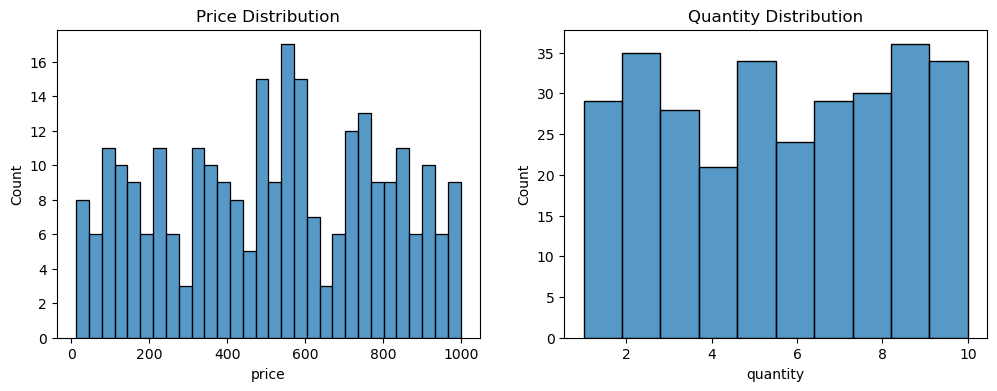

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['price'].dropna(), bins=30, kde=False)
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['quantity'], bins=10, kde=False)
plt.title('Quantity Distribution')
plt.show()

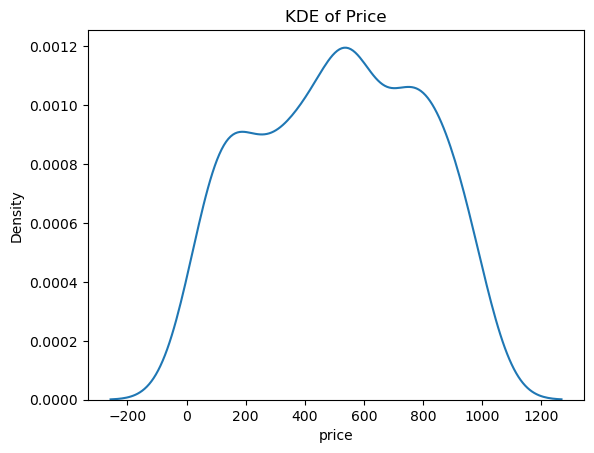

In [12]:
sns.kdeplot(df['price'].dropna())
plt.title('KDE of Price')
plt.show()

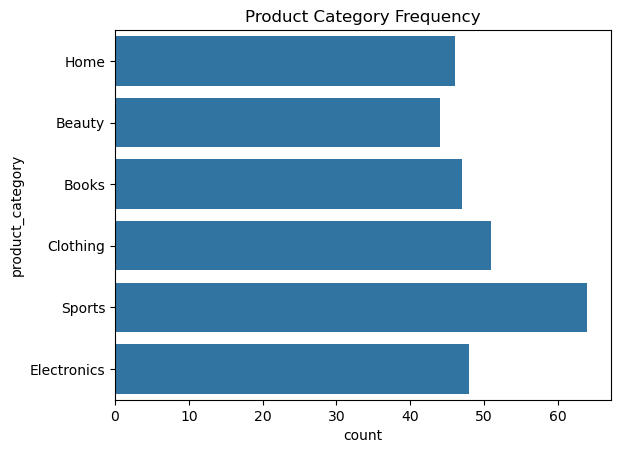

In [13]:
sns.countplot(y='product_category', data=df)
plt.title('Product Category Frequency')
plt.show()


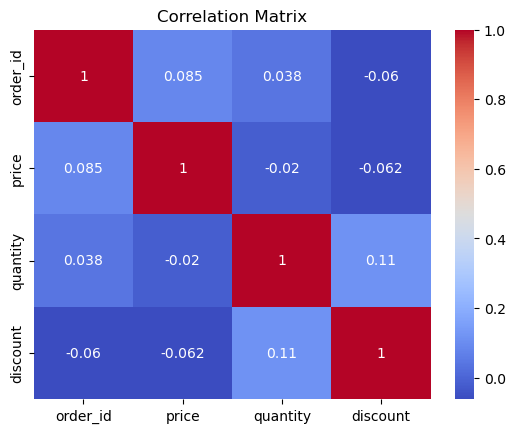

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.isnull().sum()
df['price'].fillna(df['price'].median(), inplace=True)
df['discount'].fillna(df['discount'].mean(), inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df

C:\Users\RTC140007\AppData\Local\Temp\ipykernel_14560\1915195332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


,order_id,date,customer_id,city,product_category,price,quantity,discount,payment_method
0,1,2023-01-01,C8270,Kish,Home,553.0,2,0.020000,Debit
1,2,2023-01-02,C1860,Ahvaz,Beauty,539.0,2,0.070000,PayPal
2,3,2023-01-03,C6390,Kish,Home,362.0,1,0.200000,Cash
3,4,2023-01-04,C6191,Isfahan,Books,895.0,5,0.020000,Debit
4,5,2023-01-05,C6734,Kish,Clothing,137.0,4,0.260000,Cash
...,...,...,...,...,...,...,...,...,...
295,296,2023-10-23,C6442,Tehran,Home,637.0,6,0.290000,PayPal
296,297,2023-10-24,C2895,Shiraz,Clothing,739.0,8,0.190000,Debit
297,298,2023-10-25,C3733,Isfahan,Sports,850.0,5,0.260000,Credit
298,299,2023-10-26,C4863,Isfahan,Beauty,132.0,10,0.140000,Debit


In [17]:
df['total_price'] = df['price'] * df['quantity'] * (1 - df['discount'])
sales_by_city = df.groupby('city')['total_price'].sum().sort_values(ascending=False)
sales_by_category = df.groupby('product_category')['total_price'].sum().sort_values(ascending=False)
discount_by_category = df.groupby('product_category')['discount'].mean()
sales_by_city
sales_by_category
discount_by_category

product_category
Beauty         0.148998
Books          0.162103
Clothing       0.156840
Electronics    0.163873
Home           0.137174
Sports         0.148980
Name: discount, dtype: float64

In [18]:
pivot = df.pivot_table(values='total_price', index='city', columns='product_category', aggfunc='sum', fill_value=0)
pivot

product_category,Beauty,Books,Clothing,Electronics,Home,Sports
city,,,,,,
Ahvaz,6782.390000,12660.470000,5930.500000,14212.990000,17473.120,18248.200000
Isfahan,20368.563684,24938.045000,23528.346684,18146.810000,28556.990,35649.322895
Kish,17728.000000,17445.530000,10742.579579,877.840000,13424.495,11916.224421
Mashhad,9724.185000,15145.085000,29056.320000,15494.610000,7104.700,30658.480000
Rasht,11237.880000,6122.816842,2285.760000,26061.040000,10806.675,15660.850000
Shiraz,6331.320000,9835.200000,28243.890000,13585.200000,57.720,9272.190000
Tabriz,6300.882105,14982.304105,15466.169263,19842.960000,17282.050,15851.236316
Tehran,27397.790000,15249.060000,4961.580000,12982.571263,15175.990,18468.006000


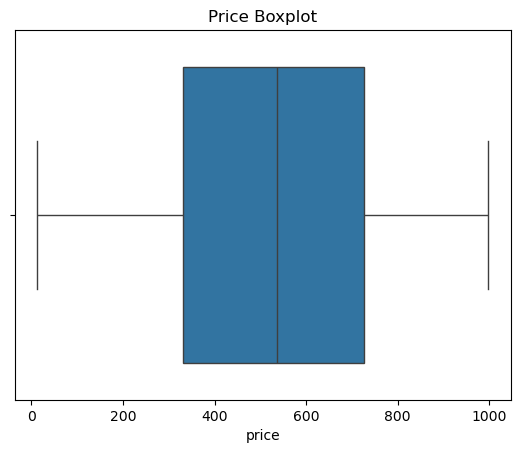

In [19]:
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()

In [20]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f'Outliers: {len(outliers)}')

Outliers: 0


Descriptive


In [21]:
total_sales = df['total_price'].sum()
top_city = df.groupby('city')['total_price'].sum().idxmax()
top_category = df.groupby('product_category')['total_price'].sum().idxmax()

print(f'Total Sales: {total_sales}')
print(f'Top City: {top_city}')
print(f'Top Category: {top_category}')

Total Sales: 729274.9381578948
Top City: Isfahan
Top Category: Sports


Diagnostic

In [22]:
lowest_city = df.groupby('city')['total_price'].sum().idxmin()
print(f'Lowest sales city: {lowest_city}')
correlation_discount_quantity = df['discount'].corr(df['quantity'])
print(f'Correlation between discount and quantity: {correlation_discount_quantity}')

Lowest sales city: Shiraz
Correlation between discount and quantity: 0.10969595751546252


Predictive


In [23]:
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date')['total_price'].sum()
avg_daily_sales = daily_sales.mean()
print(f'Average daily sales: {avg_daily_sales}')

predicted_next_month = avg_daily_sales * 30
print(f'Predicted next month sales: {predicted_next_month}')

Average daily sales: 2430.916460526316
Predicted next month sales: 72927.49381578948


Prescriptive

In [24]:
target_increase = total_sales * 0.1
category_performance = df.groupby('product_category')['total_price'].sum().sort_values(ascending=False)
print('Focus on:', category_performance.index[0])
slow_categories = df.groupby('product_category')['quantity'].mean().sort_values()
print('Offer discounts on:', slow_categories.index[0])

Focus on: Sports
Offer discounts on: Clothing


 Final report structure:
Dataset description (size, columns, missing values introduced)

EDA results (charts, correlation, insights)

How missing values were filled

Outlier analysis (before/after)

Answers to 4 analytics questions

Final management recommendations